plot scatter between ATAC-seq score and Condensability

In [1]:
# python modules
import sys
import copy
import re
import random
import glob
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy
from scipy import stats

In [2]:
# custom modules
sys.path.append('/Users/sangwoopark/Projects/condense-seq/postpro_scripts')
import graphics_edit as graphics
import load_file_edit as load_file
import Interval_dict
import statis_edit as statis

In [3]:
# matplotlib setting
%matplotlib inline
mpl.rcParams["figure.facecolor"] = "white"
mpl.rcParams["axes.facecolor"] = "white"
mpl.rcParams["savefig.facecolor"] = "white"

In [4]:
### parameters
cell_org = {'H1':'human',
            'GM':'human',
            'mCD8T:WT':'mouse',
            'mCD8T:DFMO':'mouse',
            'mCD8T:ODCKO':'mouse'}

cell_chrnames = {'H1':['chr%s' % (i) for i in range(1, 23)] + ['chrX', 'chrY'],
                 'GM':['chr%s' % (i) for i in range(1, 23)] + ['chrX'],
                 'mCD8T:WT':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:DFMO':['chr%s' % (i) for i in range(1, 20)] + ['chrX'],
                 'mCD8T:ODCKO':['chr%s' % (i) for i in range(1, 20)] + ['chrX']}


In [5]:
agent_fullname = {'sp':'Spermine(4+)',
                  'spd':'Spermidine(3+)',
                  'CoH':'Cobalt Hexammine(3+)',
                  'PEG':'PEG 8000',
                  'HP1a':'HP1$\\alpha$',
                  'HP1bSUV':'HP1$\\beta$+tSUV',
                  'LKH':'Linker histone1',
                  'Ki67':'Ki67',
                  'FUS':'FUS',
                  'Mg':'Magnesium',
                  'Ca':'Calcium'}


In [6]:
### chromosome choices
chr_choices = ['chr1']

In [7]:
### load gtab file
path = '/Users/sangwoopark/jhu_rockfish/2024_01_05_GEO/processed_files/'
gtab_fname = 'H1_NCP_sp_8_1rep_deep_1kb_score.gtab.gz'

ID_score = load_file.read_gtab(path + gtab_fname,
                               field_choices=['H1_NCP_sp_8_1rep_deep'],
                               mode='col',
                               chr_choices=chr_choices)['H1_NCP_sp_8_1rep_deep']

In [8]:
### load ATAC-seq bedgraph file
ATAC_path = '/Users/sangwoopark/jhu_rockfish/HumanEpigeneticData/ATACseq/'
ATAC_fname = '4DNFICPNO4M5.bedGraph'

ID_ATAC = load_file.read_bedgraph (ATAC_path + ATAC_fname,
                                   chr_choices=chr_choices)

In [9]:
### change to log scale
for ID, ATAC in ID_ATAC.items():
    ID_ATAC[ID] = np.log2(1.0 + ATAC)

In [10]:
### binning ATAC-seq values into 1kb bins
binID_interval = {ID:(ID[1], ID[2]) for ID in ID_score}
ID_interval = {ID:(ID[1], ID[2]) for ID in ID_ATAC}

ID_ATAC = statis.rbin_data_mean (bin_size=1000,
                                 bin_step=1000,
                                 ID_loc=ID_interval,
                                 ID_value=ID_ATAC,
                                 binID_interval=binID_interval)

hash function is built


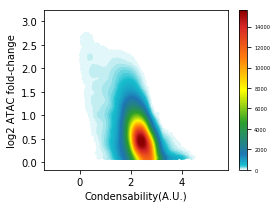

In [12]:
### scatter plot for condensability VS ATAC-seq fold change
IDs = ID_score.keys()
X = [ID_score[ID] for ID in IDs]
Y = [ID_ATAC[ID] for ID in IDs]

graphics.density_scatter(X,
                         Y,
                         xlabel='Condensability(A.U.)',
                         ylabel='log2 ATAC fold-change',
                         fig_width=4,
                         fig_height=3,
                         cbar=True)